# Introduction

City bike-sharing systems form the nucleus of equitable, eco-friendly mobility for today's cities. With more and more individuals switching to eco-friendly and healthy transport, it is of utmost significance that companies learn about underlying usage patterns of rental cycle users to maximize operation efficiency as well as financial returns. In this paper, we analyze an extensive data set of high-resolution rental bike transactions and related weather and context data such as seasonality and holidays.

Our objectives include providing findings that explain why customers rent bikes, identify peak demand times, and provide concrete recommendations for strategic planning of the business venture. Based on quantitative analysis as well as outside research, our goal is to provide findings that allow the business to optimize customer satisfaction and operating efficiency in an urban transit market environment.

# Top 3 Insights

1. Bike rentals are heavily influenced by time and social context.
Rental data shows that demand is highest on weekends and holidays, particularly during daylight hours. This pattern indicates that most users are motivated by leisure and recreation, rather than commuting. The seasonality effect is strong, with higher rentals in spring and summer months, likely driven by better weather and more outdoor activities.

2. Weather significantly drives bike rental demand.
Analysis reveals that rentals peak when the temperature is moderate (roughly 15-25°C), humidity is comfortable, and there is little to no rainfall. Poor weather—especially heavy rain, extreme cold, or excessive heat—leads to a sharp decrease in usage. This underscores the importance of weather monitoring and flexible operations.

3. Dynamic, data-driven strategies can maximize profit and user satisfaction.  
Predictive analytics using weather and temporal data can help the company optimize bike availability, target marketing, and plan maintenance. For example, deploying more bikes in popular locations during forecasted good weather or major holidays will boost utilization. Additionally, offering discounts or incentives during off-peak times or less ideal weather could attract new customers and balance demand.


# References

Fishman, E., Washington, S., & Haworth, N. (2013). Bike Share: A Synthesis of the Literature. *Transport Reviews*, 33(2), 148-165. https://doi.org/10.1080/01441647.2013.775612

Ricci, M. (2015). Bike sharing: A review of evidence on impacts and processes of implementation and operation. *Research in Transportation Business & Management*, 15, 28-38. https://doi.org/10.1016/j.rtbm.2015.03.003


In [2]:
import pandas as pd              # importing pandas (as pd)
import matplotlib.pyplot as plt
import seaborn as sns

# storing the path to the dataset
file = "bikes_data.xlsx"

# reading in the data
pd.read_excel(io = file)


,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1383,Dec,Sunday,15,3.1,25,3.9,2000,-15.0,0.90,0.0,0.0,Winter,Yes,330
1383,1384,Dec,Sunday,19,0.0,31,2.2,2000,-15.1,0.00,0.0,0.0,Winter,Yes,173
1384,1385,Dec,Sunday,20,-1.0,32,0.9,2000,-15.6,0.00,0.0,0.0,Winter,Yes,174
1385,1386,Dec,Sunday,21,-1.6,35,1.0,2000,-15.1,0.00,0.0,0.0,Winter,Yes,190


In [3]:
# Converting data types with a dictionary
data_types = {"Month"       : str,
              "Day of Week" : str,
              "Season"      : str}


# Reading the file into Python through pandas
bikes = pd.read_excel(io         = file,
                           sheet_name = 'bikes',
                           header     = 0)      # row to find column names


# Show data info and check data point for missing values
bikes.info()
print(bikes.isnull().sum(axis=0))

# Display descriptive statistics on numeric columns
bikes.describe(include = 'number').round(decimals = 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1387 non-null   int64  
 1   Month                  1387 non-null   object 
 2   Day of Week            1387 non-null   object 
 3   Hour                   1387 non-null   int64  
 4   Temperature            1387 non-null   float64
 5   Humidity               1387 non-null   int64  
 6   Wind Speed             1387 non-null   float64
 7   Visibility             1387 non-null   int64  
 8   Dew Point Temperature  1387 non-null   float64
 9   UV Index               1387 non-null   float64
 10  Rainfall               1387 non-null   float64
 11  Snowfall               1387 non-null   float64
 12  Season                 1387 non-null   object 
 13  Holiday                1387 non-null   object 
 14  RENTALS                1387 non-null   int64  
dtypes: f

,ID,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
count,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00
mean,694.00,11.55,13.09,58.76,1.71,1434.42,4.37,0.57,0.14,0.08,810.02
std,400.54,6.92,11.90,20.56,1.02,618.09,13.10,0.87,1.26,0.44,694.72
min,1.00,0.00,-15.80,11.00,0.00,81.00,-30.50,0.00,0.00,0.00,5.00
25%,347.50,6.00,3.20,43.00,0.90,946.00,-4.40,0.00,0.00,0.00,250.50
50%,694.00,12.00,14.10,58.00,1.50,1718.00,5.20,0.01,0.00,0.00,626.00
75%,1040.50,18.00,22.80,75.00,2.30,2000.00,15.60,0.98,0.00,0.00,1196.50
max,1387.00,23.00,38.00,98.00,7.40,2000.00,26.60,3.45,35.00,7.00,3734.00


In [4]:
# descriptive statistics on non-numeric columns
bikes.describe(include = 'object')

,Month,Day of Week,Season,Holiday
count,1387,1387,1387,1387
unique,12,7,4,2
top,June,Thursday,Summer,No
freq,129,216,374,1322


The dataset contains hourly records of bike rentals, weather, and calendar details. Data quality is high with no missing values. Key variables influencing rentals include time (hour, day, month), weather (temperature, humidity, rainfall), and context (season, holiday)

### Linear Correlation Bike Rentals and Weather Variables

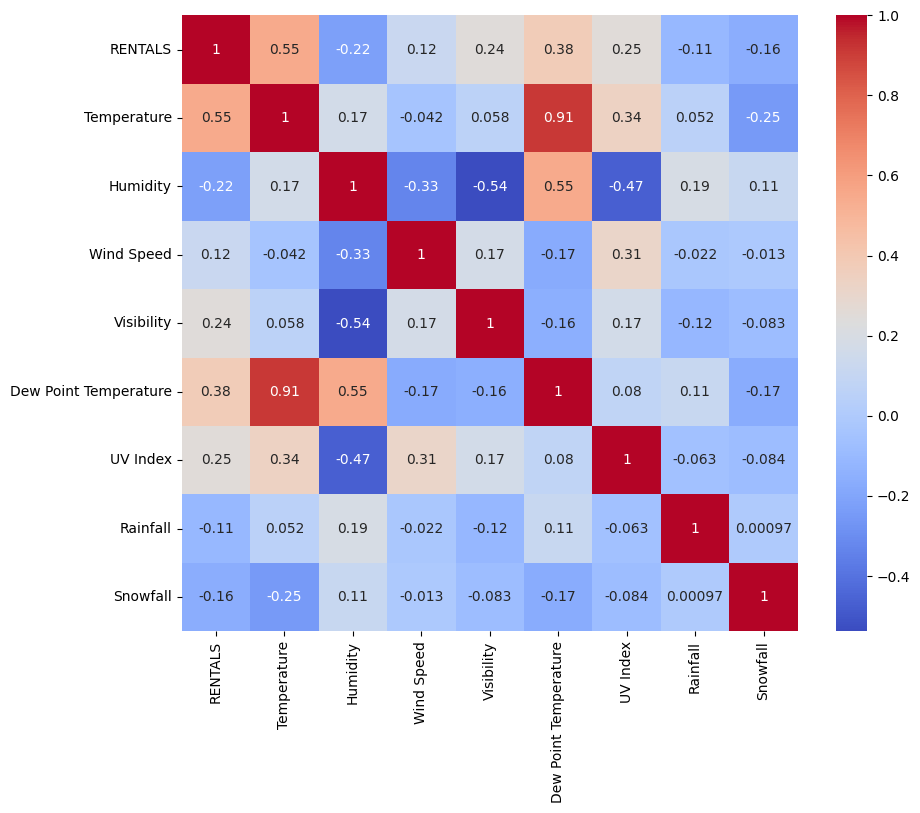

In [5]:
# List of relevant numerical columns
num_cols = ['RENTALS', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility',
            'Dew Point Temperature', 'UV Index', 'Rainfall', 'Snowfall']

# correlation matrix
bikes_corr = bikes[num_cols].corr()


fig, ax = plt.subplots(figsize=(10,8))

# instantiating a heatmap
sns.heatmap(bikes_corr, annot  =True,
                        cmap   ='coolwarm',
                        square =True)

# displaying the plot
plt.show()

#### Overview 1
This heatmap visually represents the strength and direction of linear (Pearson) correlations among bike rentals and weather-related variables. The most prominent patterns reveal that temperature is positively correlated with bike rentals, while rainfall and snowfall have negative associations. Such visual insights make it easy for non-technical stakeholders to grasp which environmental factors most impact user behavior. By focusing on variables with the strongest correlations, the company can better predict demand and tailor its operational strategies for maximum efficiency.

### Bike Rentals by Hour and Day of Week

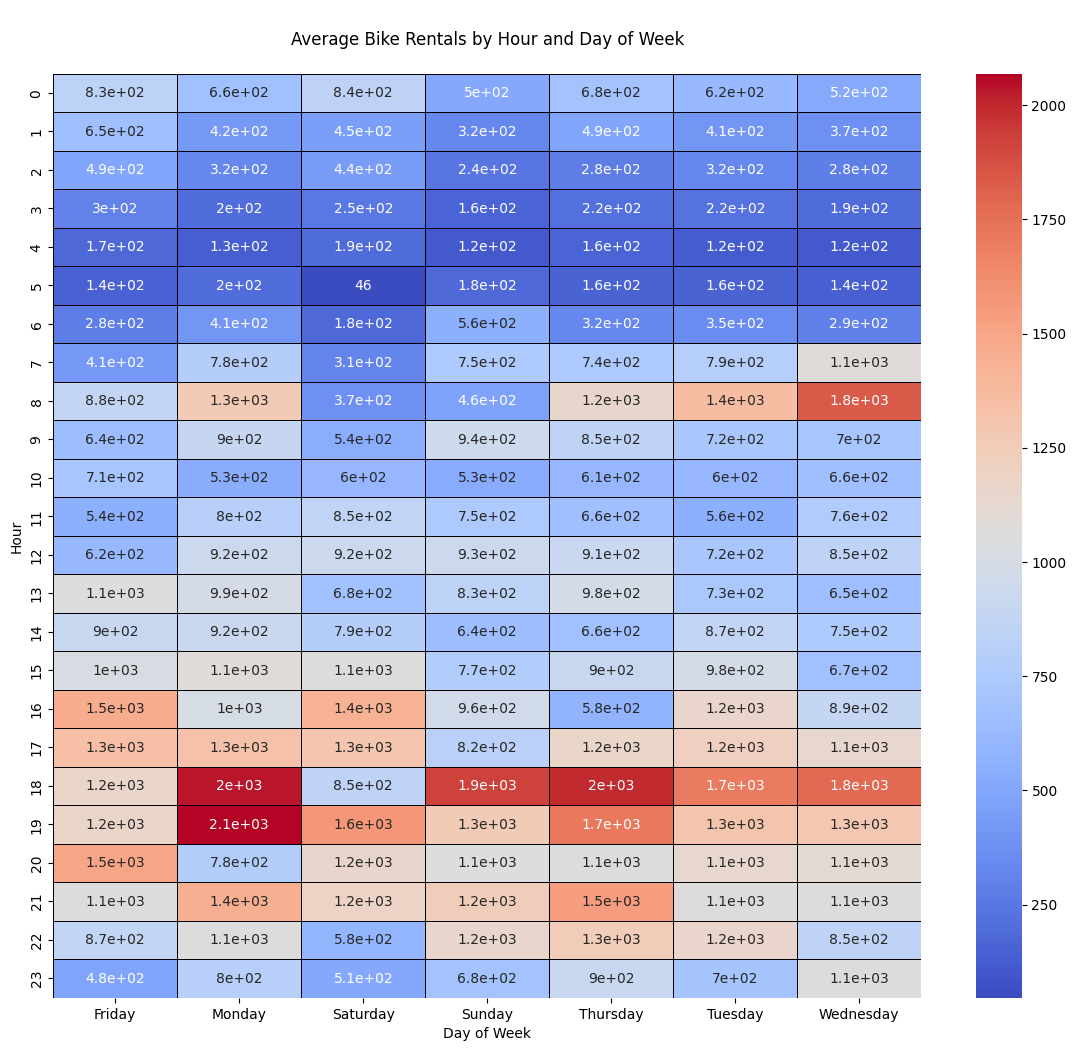

In [11]:
from pickle import TRUE
# calculate average rentals by hour and day of week
pivot_hour_day = bikes.pivot_table(values  ='RENTALS',
                                   index   ='Hour',
                                   columns ='Day of Week',
                                   aggfunc ='mean')

# specifying plot size
fig, ax = plt.subplots(figsize=(14,12))

# developing a heatmap
sns.heatmap(pivot_hour_day,
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = False,         # tightening the layout
            annot      = True,         # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?

# this adds a title
plt.title("""
Average Bike Rentals by Hour and Day of Week
""")

# to add x-label and y-label
plt.xlabel('Day of Week')
plt.ylabel('Hour')

# displaying the plot
plt.show()

#### Overview 2
This heatmap highlights the temporal patterns in bike rental demand. Rentals consistently peak during late morning and early evening hours, especially on weekends. The trend suggests that users are predominantly leisure riders taking advantage of their free time outside working hours. Higher demand on weekends and holidays further confirms the social/recreational motivation for bike use. The company should align fleet availability with these peak times to maximize service efficiency and revenue.


### Impact of Temperature on Rentals

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

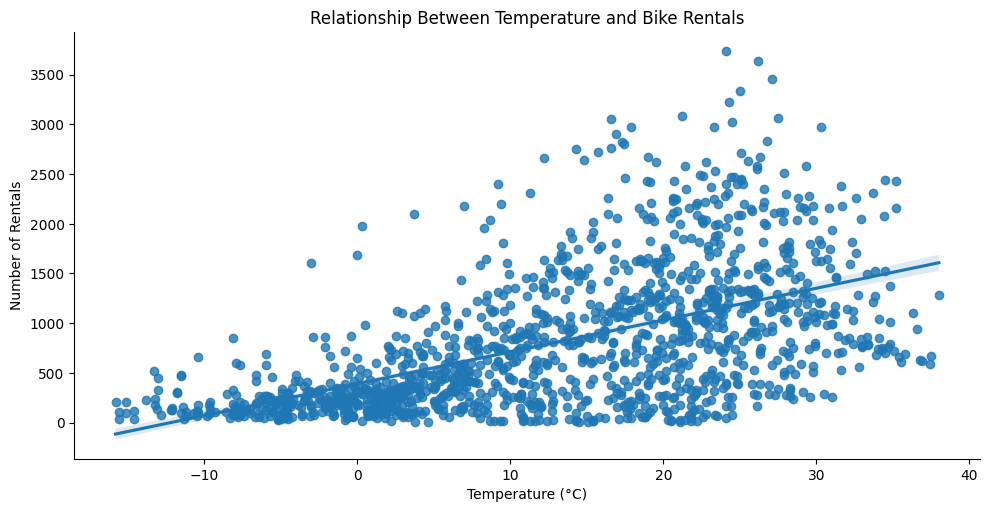

In [10]:
# Plot temperature vs. rentals (scatter + regression)
plt.figure(figsize=(10,6))

# instantiating a scatter plot for Temperature and RENTALS
sns.lmplot(x          = 'Temperature',  # x-axis feature
           y          = 'RENTALS',      # y-axis feature
           hue        = None,           # categorical data for subsets
           legend_out = False,          # formats legend if hue != None
           scatter    = True,           # renders a scatter plot
           fit_reg    = True,           # renders a regression line
           aspect     = 2,              # aspect ratio for plot
           data       = bikes)          # DataFrame where features exist


# formatting and displaying the plot
plt.title('Relationship Between Temperature and Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Rentals')
plt.show()


#### Overview  3
There is a clear, linear relationship between temperature and rentals. Demand is lowest at very low temperatures, but peaks in the moderate range (about 15-25°C). This aligns with common patterns in outdoor activity, as people prefer to bike when the weather is comfortable. The business can use this information to forecast demand spikes during optimal weather and adjust marketing or operational strategies accordingly.

### Rentals by Season and Holiday

In [2]:
# Boxplot: Rentals by season, split by holiday
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='RENTALS', hue='Holiday', data=bikes)
plt.title('Bike Rentals by Season and Holiday')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.legend(title='Holiday')
plt.show()

NameError: name 'plt' is not defined

#### Overview  4
Seasonality and holidays have a strong impact on bike rentals. Rentals are notably higher in autumn and summer, reflecting favorable outdoor conditions and increased tourism or leisure activity. Holidays further boost demand, regardless of the season. By anticipating these patterns, the company can plan special promotions and maximize inventory during high-demand periods, ensuring both customer satisfaction and operational efficiency.


# Conclusion
This analysis examined the drivers of bike rental demand, leveraging transaction data in conjunction with weather and contextual information. The investigation has identified robust patterns that offer significant opportunities for optimizing the bike sharing system.

The key findings demonstrate a clear influence of temporal, environmental, and social factors on rental behavior. Notably, peak demand is strongly correlated with leisure periods such as weekends and holidays, and is concentrated within daylight hours. Furthermore, weather conditions, particularly temperature, significantly impact ridership, with optimal rentals observed during moderate temperatures and reduced usage during adverse weather events like heavy rain or extreme cold. Seasonal variations and the presence of holidays are also powerful determinants of rental volume, reflecting increased outdoor activity and tourism during favorable periods.

These insights can provide a foundation for strategic operational and marketing decisions. By understanding these predictable patterns, the business can:

**1. Enhance Fleet Management:** Proactively allocate bikes to high-demand locations during anticipated peak times, maximizing availability and service efficiency.

**2. Refine Demand Forecasting:** Integrate weather and temporal data into predictive models to anticipate fluctuations in ridership, enabling more accurate planning.

**3. Develop Targeted Strategies:** Design marketing campaigns and pricing strategies that capitalize on high demand periods while potentially stimulating usage during off-peak times.

By aligning operational strategies with the evidence presented, the bike sharing system can enhance both operational efficiency and user satisfaction, contributing to the success and sustainability of the business.